# 1 Feedforward: Building a ReLU neural net- work


## 1.1 Draw a network with:

• 2 inputs

• 1 hidden layers with 4 hidden units and a 

• 1-class output (for binary classification)

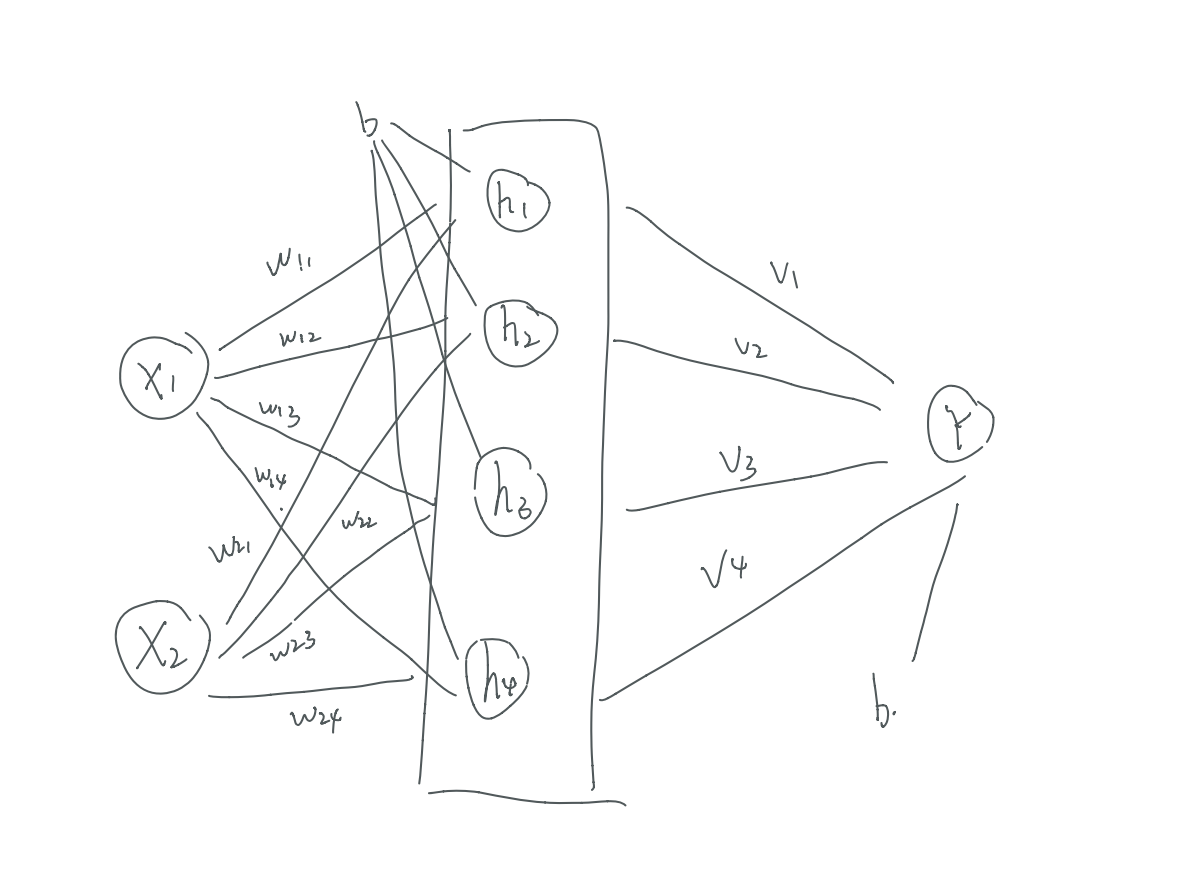

## 1.2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

h1 = max(0,x1*w11+x2*w21+b1)

h2 = max(0,x1*w12+x2*w22+b2)

h3 = max(0,x1*w13+x2*w23+b3)

h4 = max(0,x1*w14+x2*w24+b4)

y_input =h1*v1+h2*v2+h3*v3+h4*v4+c

y_output = 1/(1+e^(-y_input))


## 1.3. Write out the forward-pass function in python, call it ff nn ReLu(...)

In [2]:
import numpy as np

In [3]:
def relu(z):
    return np.maximum(0,z)

def sigmoid(z):
    return 1/(1 + np.exp(-np.array(z)))

def nn_layer(x, w, b, f):
    return f(np.dot(x, w) + b)

def ff_nn_ReLu(X,W_1,b_1,f_1,W_2,b_2,f_2):
    H = nn_layer(X, W_1, b_1, f_1)
    Y_hat = nn_layer(H, W_2, b_2, f_2)
    return Y_hat

## 1.4.what are the class probabilities associated with the forward pass of each sample?

In [4]:
W = [[1, -1, 0, 1], [0, 0, 0.5, 1]]
b = [0, 0, 1, 0]
V = [1, 0, -1, 1]
c = 1
X = [[1, -1], [0, -1], [0, 1]]
ff_nn_ReLu(X,W,b,relu,V,c,sigmoid)

array([0.81757448, 0.62245933, 0.62245933])

# 2 Gradient Descent

## 2.1. What are the partial derivatives of f with respect to x and to y?


fx(x,y)=-3x^2+100x-200y^2

fy(x,y)=800y^3-400xy

## 2.2 Create a visualization of the contours of this function.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

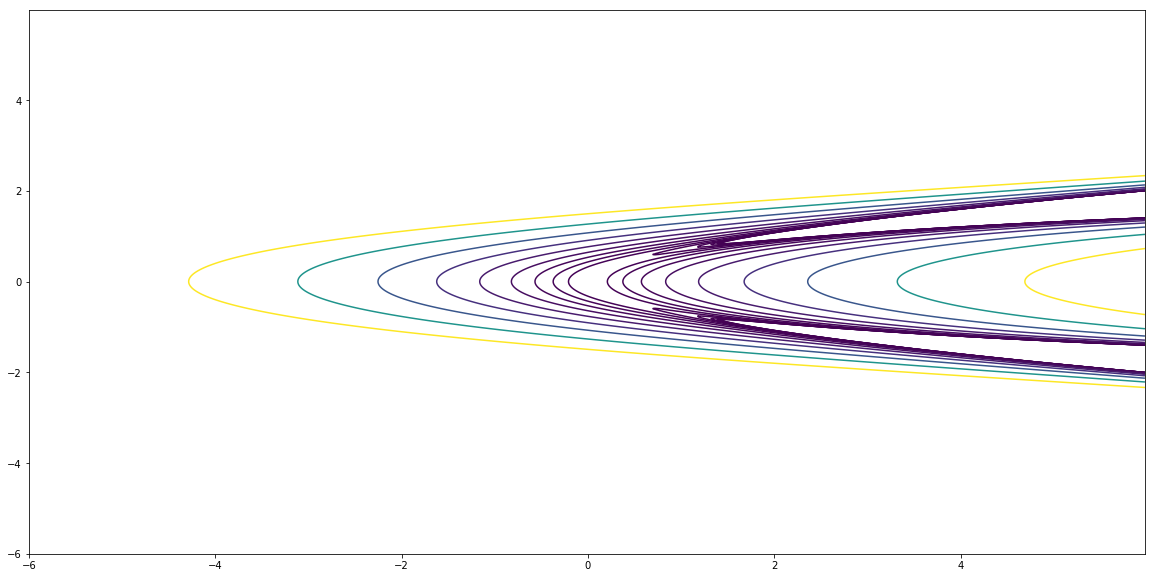

In [6]:
x = np.arange(-6.0, 6.0, 0.02)
y = np.arange(-6.0, 6.0, 0.02)
X, Y = np.meshgrid(x, y)
Z = (3-X**3)+50*(2*Y**2-X)**2
plt.figure(figsize=(20,10))
plt.contour(X,Y,Z,np.logspace(-1,3,15))

## 2.3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [7]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2+100*x-200*y**2
    df_dy = 800*y**3-400*x*y 
    return np.array([df_dx, df_dy])


def grad_descent(starting_point, iterations, learning_rate):
    if starting_point is None:
        point = np.random.uniform(-10,10,size=2)
    else:
        point=starting_point
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate*grad
        trajectory.append(point)
    return np.array(trajectory)

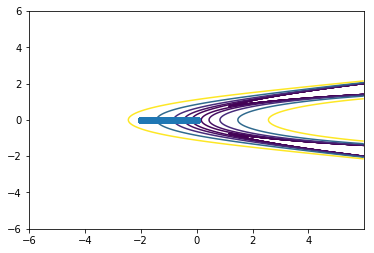

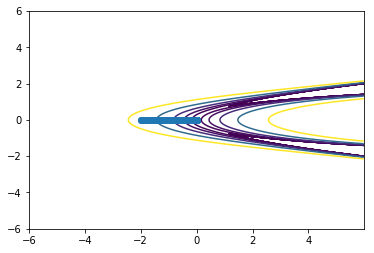

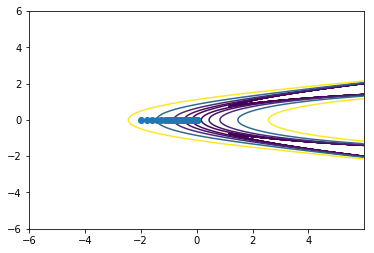

In [8]:
for i in [0.00001,0.0001,0.001]:
  traj = grad_descent(starting_point=[-2,0],iterations=10000, learning_rate=i)
  fig, ax = plt.subplots()
  plt.contour(X,Y,Z,np.logspace(-4,2.5,15))
  x= traj[:,0]
  y= traj[:,1]
  plt.plot(x,y,'-o')


## 2.4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [9]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is not None:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad=grad_f(point)
        v = alpha * v + epsilon *grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

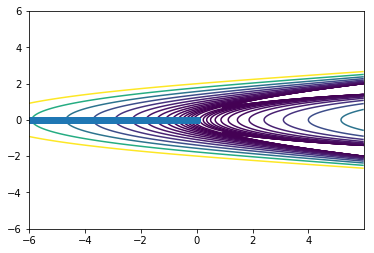

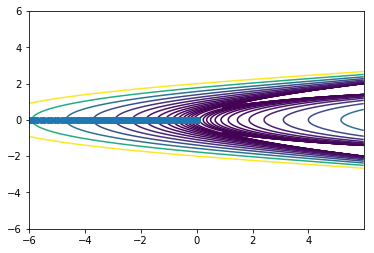

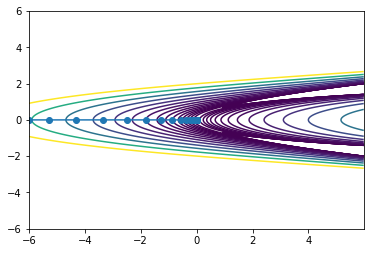

In [10]:
for i in [0.00001,0.0001,0.001]:
  traj = grad_descent_with_momentum(starting_point=np.array([-6,0]),iterations=5000,epsilon=i,alpha=.5)
  fig, ax = plt.subplots()
  plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
  x= traj[:,0]
  y= traj[:,1]
  plt.plot(x,y,'-o')

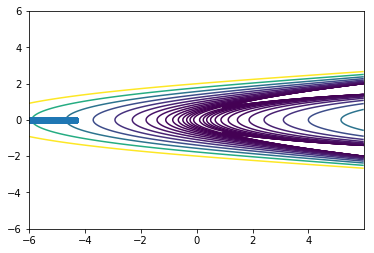

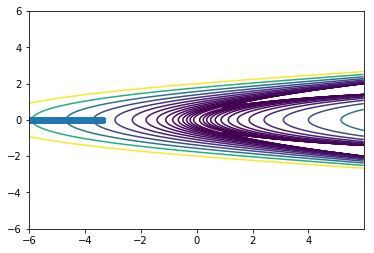

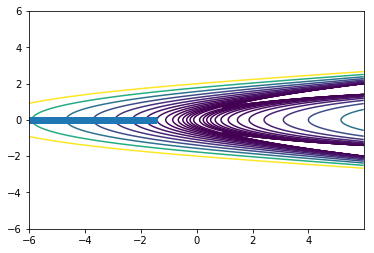

In [11]:
for i in [0.1,0.5,0.8]:
  traj = grad_descent_with_momentum(starting_point=np.array([-6,0]),iterations=50000,epsilon=0.00000005,alpha=i)
  fig, ax = plt.subplots()
  plt.contour(X, Y, Z,np.logspace(-0.5,3.5,20))
  x= traj[:,0]
  y= traj[:,1]
  plt.plot(x,y,'-o')

# 3 Backprop

## 3.1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.


In [12]:
#ei = (y/y_hat - (1-y)/(1-y_hat))
#dL_dc = ei* y_hat*(1-y_hat) 
#dL_dv1 = ei * y_hat*(1-y_hat)*h1(out)
#dL_dv2 = ei * y_hat*(1-y_hat)*h2(out)
#dL_dv3 = ei * y_hat*(1-y_hat)*h3(out)
#dL_dv4 = ei * y_hat*(1-y_hat)*h4(out)
#dL_db1 = ei * y_hat*(1-y_hat) *v1
#dL_db2 = ei * y_hat*(1-y_hat) *v2
#dL_db3 = ei * y_hat*(1-y_hat) *v3
#dL_db4 = ei * y_hat*(1-y_hat) *v4
#dL_dwij = xi * ei * y_hat*(1-y_hat) *vj
             


## 3.2. Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [3]:
def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))
def grad_f(param_vec, x, y):
    
    W, b, v, c = pack_params(param_vec)
    
    # forward pass
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    # backward pass
    dL_dc = binary_xent_residual(y, y_hat).dot( y_hat*(1-y_hat) )
    
    dL_dv = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(h)
    
    dL_db = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(relu_derivative(a))*v
  
    dL_dw = x.T.dot(np.expand_dims((binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))
             
    
    return np.array([dL_dw[0,0], dL_dw[0,1], dL_dw[0,2], dL_dw[0,3], 
                     dL_dw[1,0], dL_dw[1,1], dL_dw[1,2], dL_dw[1,3],
                     dL_db[0], dL_db[1], dL_db[2], dL_db[3],
                     dL_dv[0], dL_dv[1], dL_dv[2], dL_dv[3], dL_dc]) / len(y) 

## 3. Generate a synthetic dataset like the XOR pattern (see below).

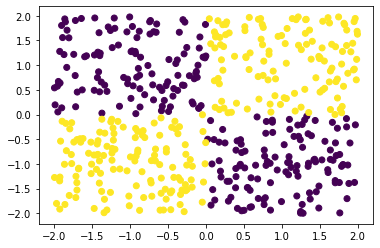

In [4]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

## 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.


In [79]:
def relu_derivative(x):
    return np.where(x>0, 1, 0)
def yhat(x, W, b, v, c):
    # returns model prediction 
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y
def loss(y, y_hat):
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))



def pack_params(param_vec):
    w_11, w_12,w_13,w_14, w_21, w_22,w_23,w_24, b_1, b_2,b_3,b_4, v_1, v_2,v_3,v_4, c = param_vec
    W = np.array([[w_11, w_12,w_13,w_14],[w_21, w_22,w_23,w_24]])
    b = np.array([b_1, b_2,b_3,b_4])
    v = np.array([v_1, v_2,v_3,v_4])
    c = np.array([c])
    return((W, b, v, c))
def grad_descent(x, y,  iterations=10, learning_rate=0.01):
    point = np.random.uniform(-.1,.1,size=17).astype("float32")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

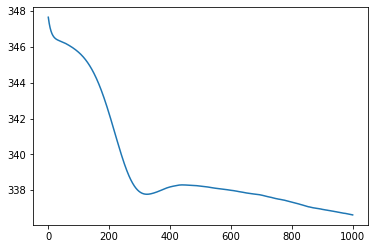

In [91]:
traj, losses = grad_descent(x, y, iterations=1000,learning_rate=0.2)
plt.plot(losses)

## 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [95]:
def grad_descent(x, y,  iterations=200, alpha=.02, epsilon=0.05):
    point = np.random.uniform(-.1,.1,size=17).astype("float32")
    trajectory = [point]
    v = np.zeros(point.size)
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad=grad_f(point, x, y)
        v = alpha * v + epsilon *grad
        point = point + v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

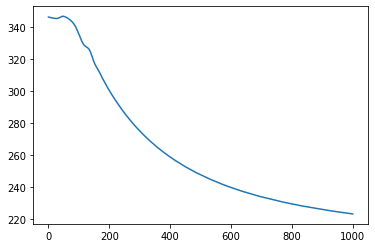

In [113]:
point, losses = grad_descent(x, y, iterations=1000,alpha=0.9, epsilon=0.1)
plt.plot(losses)


The model with momentum is better than model without where it converge quicker.


## 6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

In [1]:
x1 = np.arange(-2.0, 2.0, 0.025)
x2 = np.arange(-2.0, 2.0, 0.025)
X1, X2 = np.meshgrid(x1, x2)
ynew = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(point[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, ynew)
plt.scatter(x[:,0],x[:,1],c=y)

NameError: name 'np' is not defined

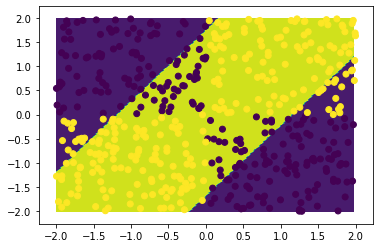